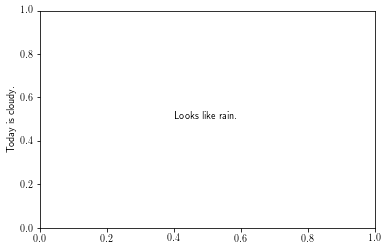

In [1]:
%matplotlib inline
pdf_name = 'multicolored_text_example.pdf'

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{color}')
rc('pgf', preamble=r'\usepackage{color}')

import matplotlib.pyplot as plt

plt.figure()
plt.ylabel(r'\textcolor{red}{Today} '+ r'\textcolor{green}{is} '+ r'\textcolor{blue}{cloudy.}')
plt.annotate(r'\textcolor{red}{Looks} '+ r'\textcolor{green}{like} '+ r'\textcolor{blue}{rain.}', xy=(1, 1), xytext=(0.4, 0.5))

plt.savefig(pdf_name);

In [2]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF(pdf_name,size=(200, 200))

In [3]:
from IPython.display import IFrame
IFrame(pdf_name, width=200, height=200)

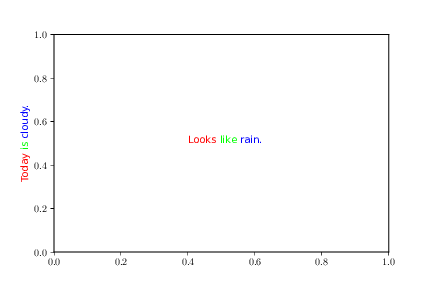

In [4]:
from wand.image import Image  

imageFromPdf = Image(filename=pdf_name)  
pages = len(imageFromPdf.sequence)  

image = Image(  
  width=imageFromPdf.width,  
  height=imageFromPdf.height * pages  
)  
for i in range(pages):  
  image.composite(  
  imageFromPdf.sequence[i],  
  top=imageFromPdf.height * i,  
  left=0  
)  
image.format="png"  
image 